In [1]:
import numpy as np
import librosa
from matplotlib import pyplot as plt
from IPython.display import display, Audio
from glob import glob
import os

from utils import draw_spec, audioshow
# from stft import extract_frames, stft, overlapadd, istft, LSEE_MSTFTM, SER, ola_tsm
# from tsm import SynchronousOLA, LSEE_TSM

In [2]:
dir_path = "./*.wav"
for i in range(len(glob(dir_path))):
    print(f'[{i:02d}] {os.path.basename(glob(dir_path)[i])}')

[00] sample_korean.wav
[01] sample.wav
[02] sample_long.wav


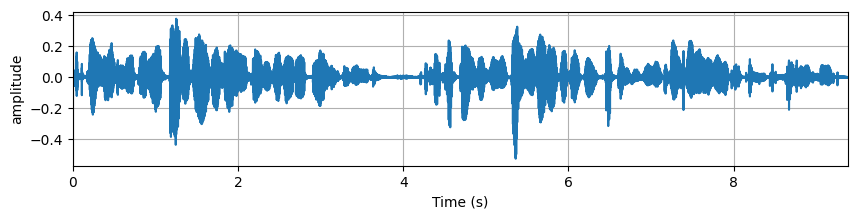

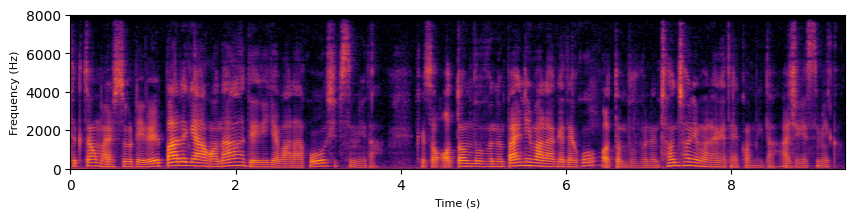

In [3]:
FIGSIZE = (10,2)

index = 0
y, sr = librosa.load(glob(dir_path)[index], sr=16000)

display(Audio(y, rate=sr))
audioshow(y, sr=sr, figsize=FIGSIZE)
_ = draw_spec(y, sr=sr, figsize=FIGSIZE, use_colorbar=False)

## TSM

STFT of original signal (shape): (513, 587)
Original signal length: 150094, Reconstructed signal length: 130816


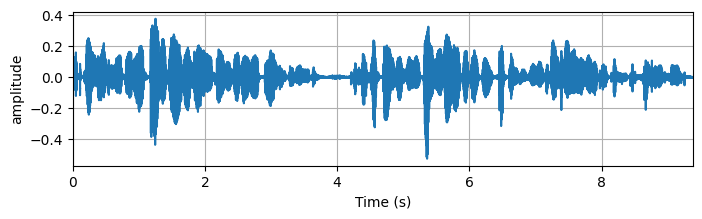

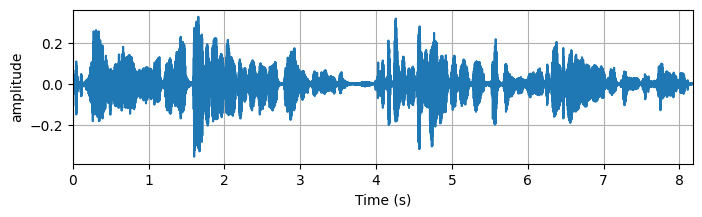

In [4]:
from tsm_selective import mod_LSEE_TSM

# Example parameters
WINLEN = 1024
HOPLEN = 256  # Default hop length
RATE = 0.5
FRAME_RANGES = [(10, 35),  (85, 150), (250, 350), (550, 750), (800, 900)]  # Multiple frame ranges
RATE_RANGES = [0.5, 2, 2, 2, 0.5, ]  # Rates for frame ranges
NUM_ITERATIONS = 50
INITIAL_METHOD = 'gaussian' # ['gaussian', 'sola', 'zero_phase']
VERBOSE = True

# Load audio
y, sr = librosa.load(glob(dir_path)[0], sr=16000)

# Perform TSM with variable rates
y_reconstructed = mod_LSEE_TSM(
    y, rate=RATE, win_length=WINLEN, frame_ranges=FRAME_RANGES, 
    rate_ranges=RATE_RANGES, num_iterations=NUM_ITERATIONS, initial=INITIAL_METHOD, 
    win_type='hann', verbose=VERBOSE
)

# Display results
print(f"Original signal length: {len(y)}, Reconstructed signal length: {len(y_reconstructed)}")
audioshow(y)
audioshow(y_reconstructed)
display(Audio(y, rate=sr))
display(Audio(y_reconstructed, rate=sr))